In [69]:
from PIL import Image, ImageDraw, ImageFont
import IPython.display as display

w=128
h=160

In [70]:
TOP_LEFT=(0,0)
TOP_RIGHT=(w-1, 0)
BOTTOM_LEFT=(0, h-1)
BOTTOM_RIGHT=(w-1, h-1)

WHITE=(255,255,255)
BLACK=(0,0,0)
RED=(255,0,0)
BLUE=(0,0,255)
GREEN=(0,255,0)

In [108]:
class TFT_LCD:
    def __init__(self, width: int, height: int):
        self.width = width
        self.height = height
        self.fill_screen('white')
        self.cursor_x = 0
        self.cursor_y = 0
        self.font = ImageFont.load_default()
        self.font_size = 1


    def show(self):
        border_size = 4
        border_color = (255, 0, 0)
        bordered_img = Image.new("RGB", (self.width + 2 * border_size, self.height + 2 * border_size), border_color)

        bordered_img.paste(self.screen, (border_size, border_size))

        display.display(bordered_img)


    def fill_screen(self, color: tuple):
        self.screen = Image.new("RGB", (self.width, self.height), color)


    def draw_pixel(self, coord: tuple, color: tuple|str):
        if 0 <= coord[0] < self.width and 0 <= coord[1] < self.height:
            self.screen.putpixel(coord, color)


    def draw_line(self, start: tuple, end: tuple, color: tuple):
        draw = ImageDraw.Draw(self.screen)
        draw.line([start, end], fill=color)


    def set_cursor(self, x: int, y: int) -> None:
        self.cursor_x = x
        self.cursor_y = y


    def set_font(self, font_path):
        self.font = ImageFont.truetype(font_path, self.font_size)


    def set_font_size(self, font_size: int):
        self.font_size = font_size


    def draw_text(self, text: str, color: tuple) -> None:
        draw = ImageDraw.Draw(self.screen)
        draw.text((self.cursor_x, self.cursor_y), text, font=self.font, fill=color)


    def set_rotation(self, angle: int):
        angle = [0, 90, 180, 270][angle]
        self.screen = self.screen.rotate(angle, expand=True)

        if angle in [90, 270]:
            self.width, self.height = self.height, self.width


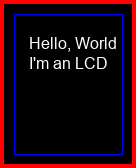

In [ ]:
lcd = TFT_LCD(w,h)

lcd.fill_screen(BLACK)

lcd.set_rotation(1)

lcd.draw_line((10, 10), (lcd.width-10, 10), BLUE)
lcd.draw_line((10, lcd.height-10), (lcd.width-10, lcd.height-10), BLUE)

lcd.draw_line((10, 10), (10, lcd.height-10), BLUE)
lcd.draw_line((lcd.width-10, 10), (lcd.width-10, lcd.height-10), BLUE)

lcd.set_font_size(16)
lcd.set_font("Arial.ttf")

lcd.set_cursor(25,30)
lcd.draw_text("Hello, World", WHITE)
lcd.set_cursor(25,50)
lcd.draw_text("I'm an LCD", WHITE)

lcd.show()